# Matplotlib
## Basics

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2021](https://github.com/escape2020/school2021)

In [3]:
%matplotlib inline
import matplotlib as ml
import numpy as np
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n")

rng = np.random.default_rng(42)  # initialise our random number generator

Python version: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
NumPy version: 1.19.5
Matplotlib version: 3.3.3



In [4]:
n = 100
xs = np.linspace(0, 2*np.pi, n)
ys = np.sinc(xs)

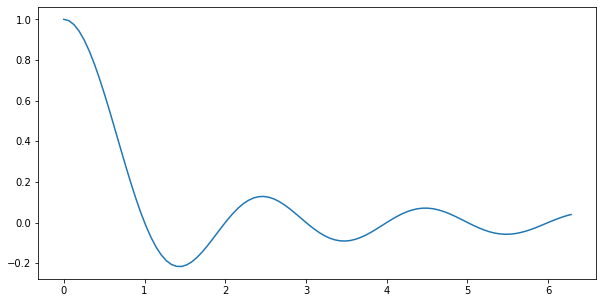

In [5]:
plt.plot(xs, ys)

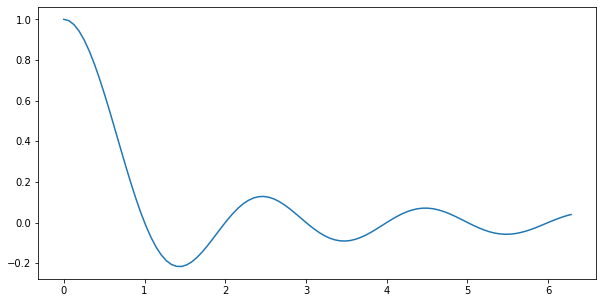

In [6]:
plot = plt.plot(xs, ys)

In [7]:
plot

not that good to overuse plot, because when we use title and so on we are fucking up hidden things of the library

## Figure

it is much better to create your own object, that is a plt.figure()

In [8]:
fig = plt.figure()

<Figure size 720x360 with 0 Axes>

In [9]:
ax = fig.add_axes([0, 0, 1, 1])

the figure is like defining a canvas, now with add_axes we are setting the grid of the canvas

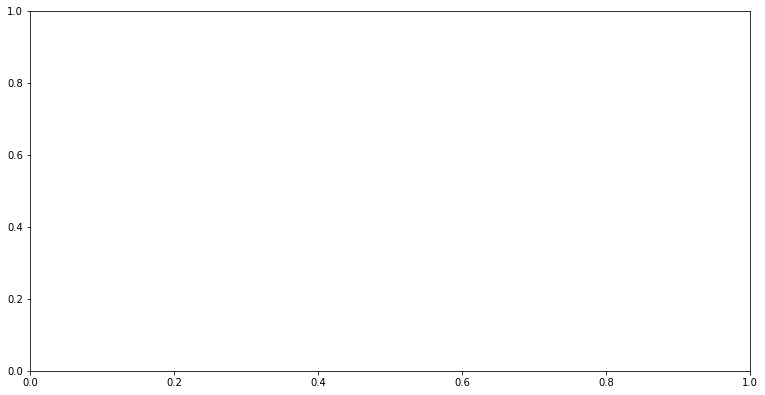

In [10]:
fig

In [11]:
ax.scatter(xs, ys, label="sensor Q")

the grid can be completed with a scatterplot, a continuous function, ...

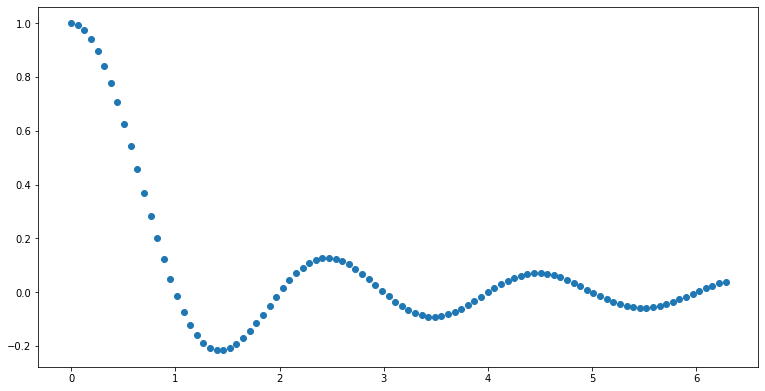

In [12]:
fig

In [13]:
sub_ax = fig.add_axes([0.5, 0.5, 0.4, 0.4])

We can also insert another grid environment inside our main axes. The syntax is add_axes(lower x position, lower y position, )

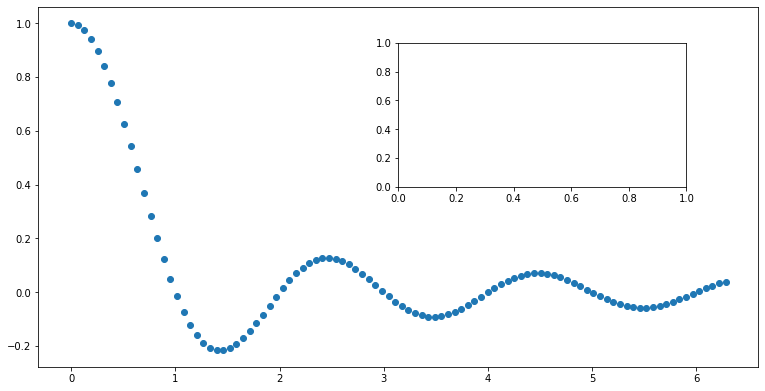

In [14]:
fig

In [15]:
sub_ax.plot(xs, np.sin(xs), color="salmon", label="sensor P")
sub_ax.plot(xs, np.sin(xs)*0.9, color="steelblue", linestyle="-.", label="lower/upper")

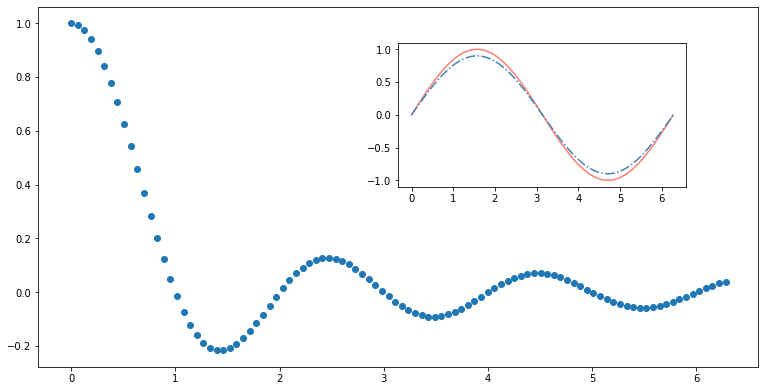

In [16]:
fig

In [17]:
ax.set_xlabel("time [s]")
ax.set_ylabel("voltage [mV]")

Text(3.200000000000003, 0.5, 'voltage [mV]')

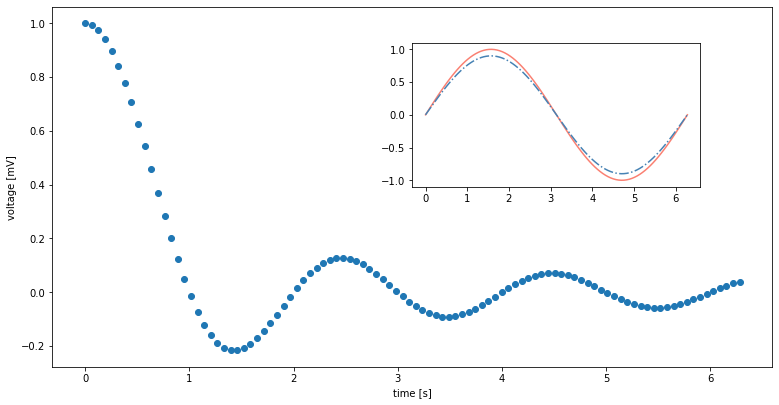

In [18]:
fig

In [19]:
sub_ax.set_xlabel("time [s]")
sub_ax.set_ylabel(r"current [$\mu$A]")

Text(377.2, 0.5, 'current [$\\mu$A]')

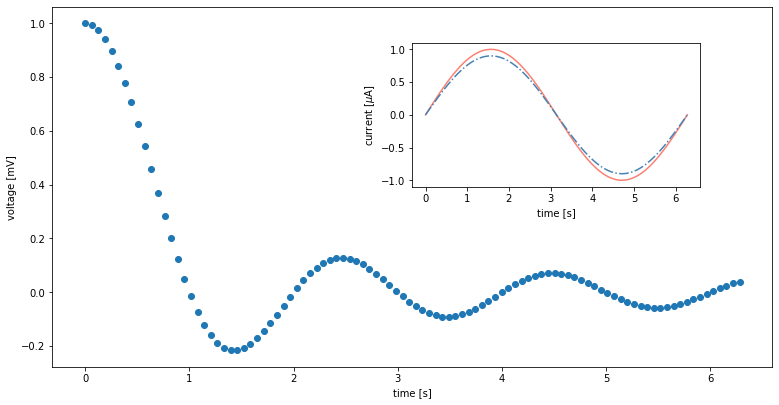

In [20]:
fig

In [21]:
ax.legend()

In [22]:
sub_ax.legend()

Both our plots can have legends, titles and so on

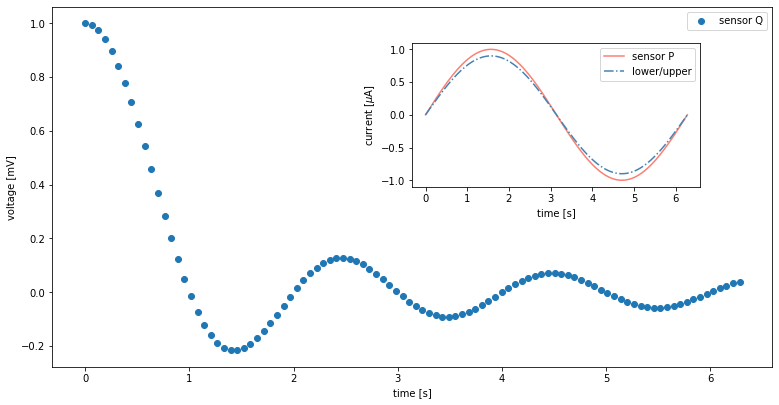

In [23]:
fig

In [24]:
ax.axhline(0.15, linestyle=":", color="#aabbcc")

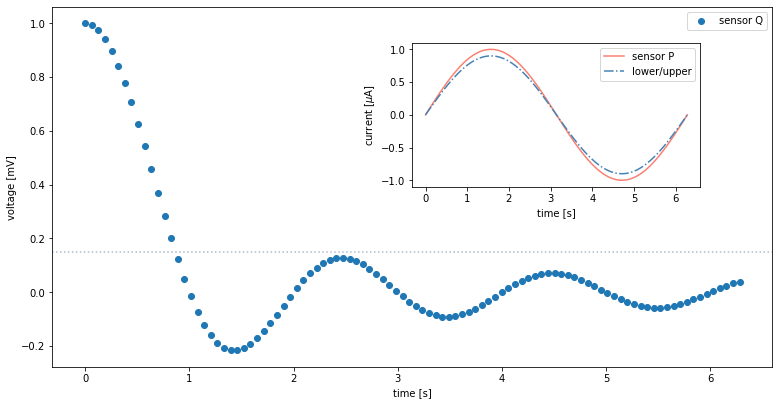

In [25]:
fig

In [26]:
toi = 2.13  # time [s]

In [27]:
opts = dict(linestyle="-", color="deepskyblue", linewidth=2)
ax.axvline(toi, **opts)
sub_ax.axvline(toi, **opts)

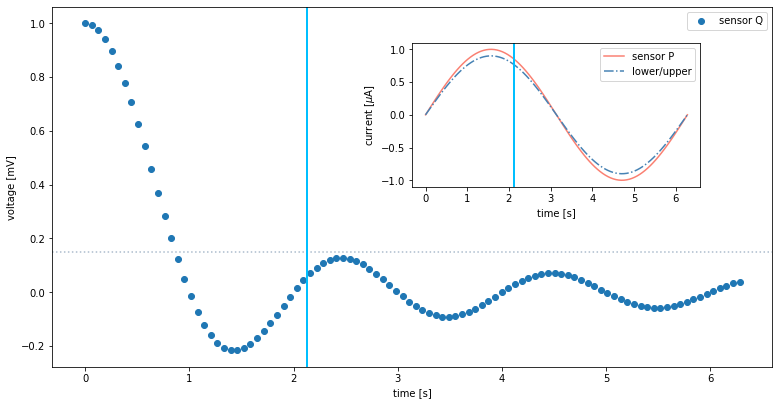

In [28]:
fig

In [29]:
ax.grid(color="#dddddd")
sub_ax.grid(color="slategrey")

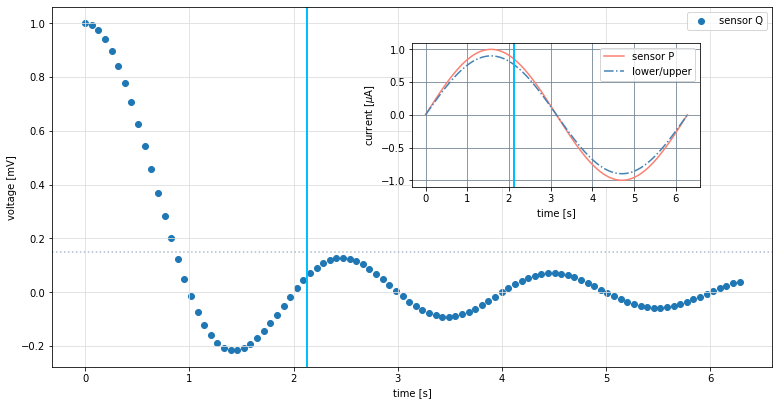

In [30]:
fig

In [31]:
for axis in [ax.xaxis, ax.yaxis]:
    axis.label.set_fontsize(20)

we make a for loop to change the font size of both our labels of our plots

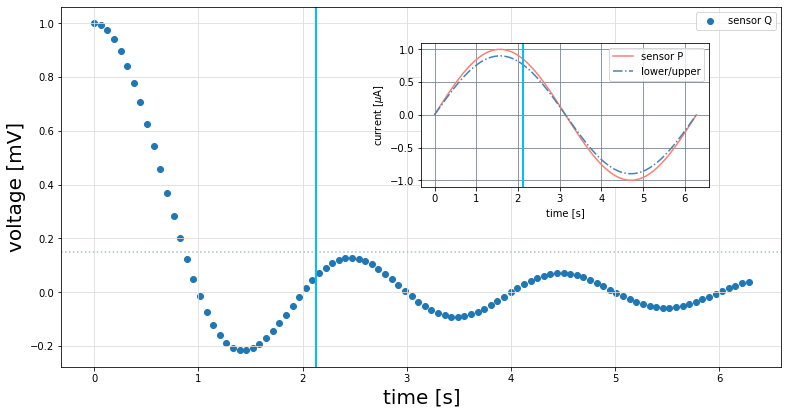

In [32]:
fig

In [33]:
sub_ax.set_position([0.45, 0.4, 0.52, 0.5])

we may want to shift the smaller subplot with respect to the larger, make it bigger 

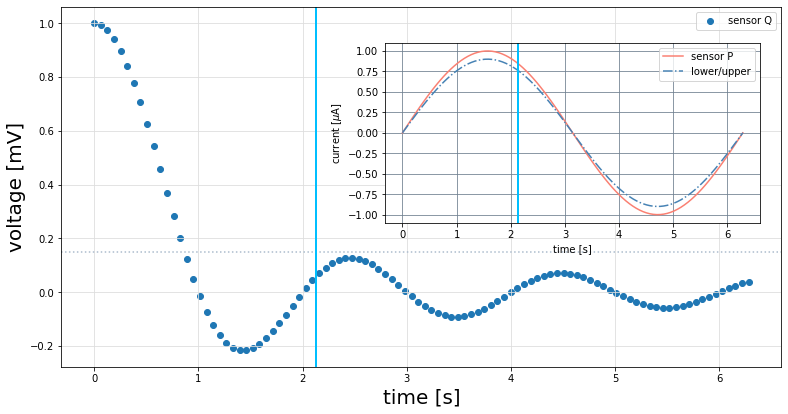

In [34]:
fig

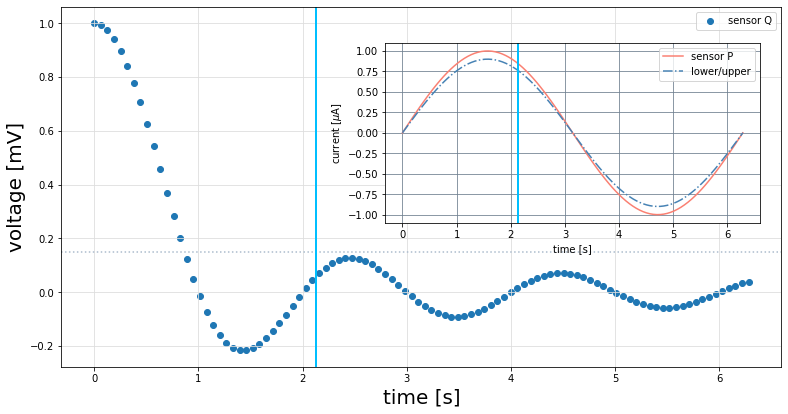

In [35]:
fig

In [36]:
import scipy.signal

we may want to underline the peaks of our plot with other markers

In [37]:
peak_idx = scipy.signal.find_peaks_cwt(ys, np.arange(1, 5))

In [38]:
peak_idx

array([ 1,  2,  3,  4, 38, 70, 71, 98])

In [39]:
ax.scatter(xs[peak_idx], ys[peak_idx], c="red", marker="X", s=100)

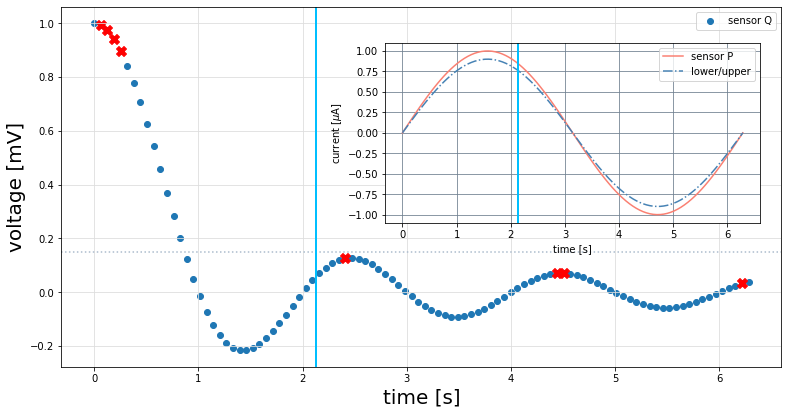

In [40]:
fig

we also may want to save the plots in another type of file, for example a pdf or a png

In [41]:
fig.savefig("the_plot.pdf", bbox_inches="tight")  # the filename extension defines the media type

In [42]:
fig.savefig("the_plot.png", bbox_inches="tight")

## Working with subplots

The `plt.subplots()` utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

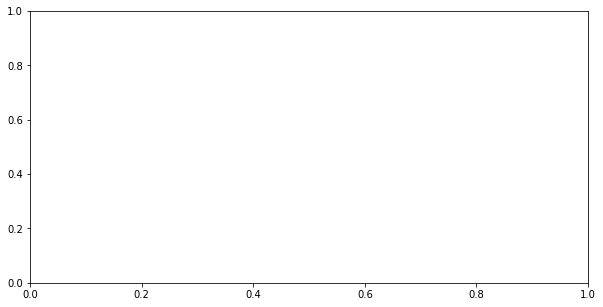

In [43]:
fig, ax = plt.subplots()  # a one-shot to create a figure with an axes

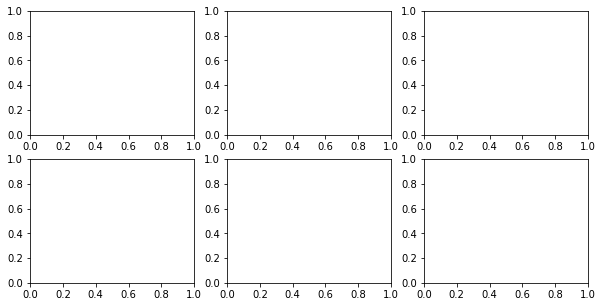

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3)

this creates in one shot a lot of plots with pre determined distances. We divided the figure in different parts

As we see, the situation now is that we have an array of objects (an array of subplots)

In [45]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [46]:
axes[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [47]:
axes[1]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [48]:
axes[0, 2].scatter(xs, np.cos(xs))

we can therefore fill with a scatterplot just one object

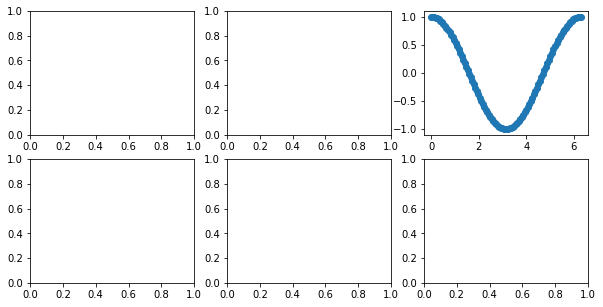

In [49]:
fig

In [ ]:
list

In [50]:
axes.flat[4].scatter(xs, ys)

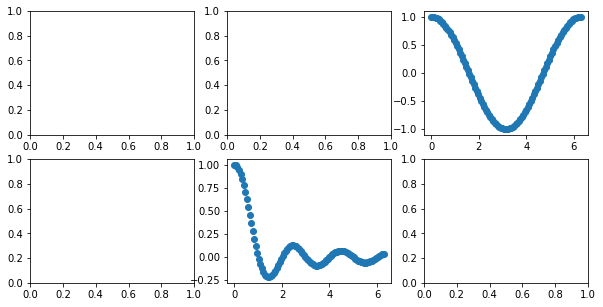

In [51]:
fig

In [52]:
colors = plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

for func, ax, color in zip([np.cos, np.sin, np.sinc, np.tan, np.tanh, np.exp], axes.flat, colors):
    ax.plot(xs, func(xs), color=color)

we can make use of colormaps to get functions in different colors. The firs line of code defines an interval (0,1) divided into steps that colro the plot

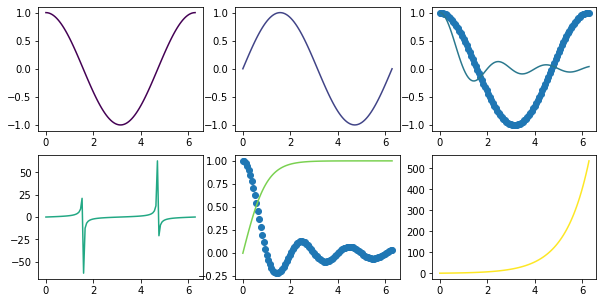

In [53]:
fig

In [54]:
plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [55]:
plt.cm.viridis(0.5)

(0.127568, 0.566949, 0.550556, 1.0)

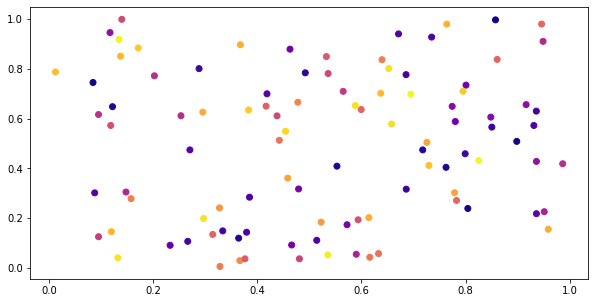

In [56]:
fig, ax = plt.subplots()
n = 100
xs = rng.random(n)
ys = rng.random(n)
ms = rng.random(n)
ax.scatter(rng.random(n), rng.random(n), c=ms, cmap="plasma")

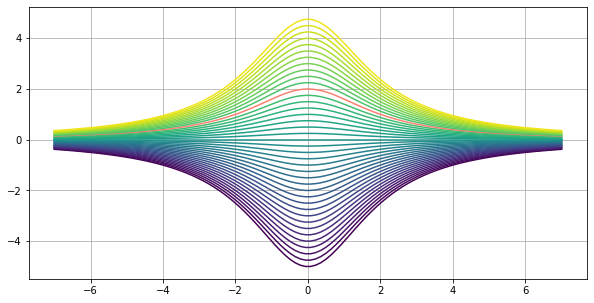

In [57]:
fig, ax = plt.subplots()

n = 100
xs = np.linspace(-7, 7, n)

N = 40
colors = iter(plt.cm.viridis(np.linspace(0, 1, N)))

for k in range(-N//2, N//2):
    color = "salmon" if k == 8 else next(colors)
    ax.plot(xs, k / (xs**2 + 4), c=color)
    
ax.grid()

## Histograms

In [58]:
data1 = rng.normal(23, 5, 1000)
data2 = rng.normal(42, 5, 10000)

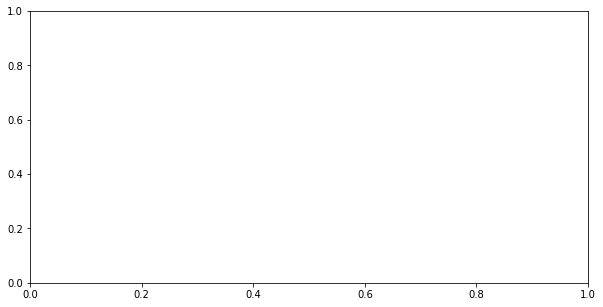

In [59]:
fig, ax = plt.subplots()

In [60]:
ax.hist(data1, bins=100)
ax.hist(data2, bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   1.,   3.,   8.,   4.,   4.,   6.,  15.,  12.,  11.,
         11.,  21.,  21.,  27.,  34.,  28.,  48.,  50.,  85.,  82.,  93.,
         99., 107., 137., 159., 143., 176., 197., 215., 187., 242., 260.,
        272., 298., 317., 298., 308., 359., 328., 361., 342., 327., 321.,
        297., 298., 306., 306., 273., 251., 256., 210., 185., 198., 196.,
        158., 131., 121., 122.,  96.,  91.,  75.,  74.,  55.,  55.,  46.,
         33.,  24.,  18.,  22.,  16.,  13.,  10.,   8.,  10.,   4.,   2.,
          7.,   4.,   4.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([20.05442708, 20.47517401, 20.89592094, 21.31666787, 21.7374148 ,
        22.15816173, 22.57890866, 22.9996556 , 23.42040253, 23.84114946,
        24.26189639, 24.68264332, 25.10339025, 25.52413718, 25.94488411,
        26.36563105, 26.78637798, 27.20712491, 27.62787184, 28.04861877,
        28.4693657 , 28.89

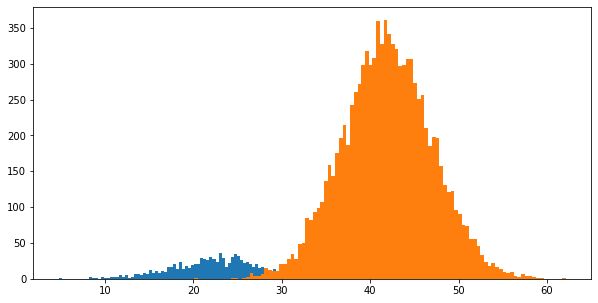

In [61]:
fig

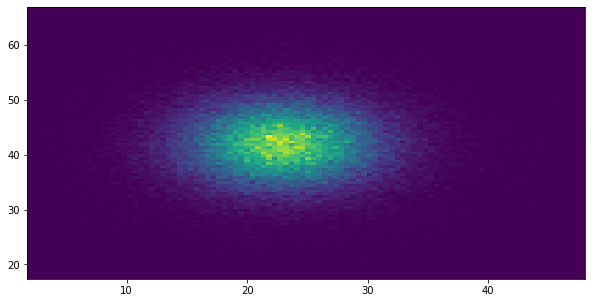

In [62]:
N = 100000

data1 = rng.normal(23, 5, N)
data2 = rng.normal(42, 5, N)

fig, ax = plt.subplots()

ax.hist2d(data1, data2, bins=100);